# Chest X-ray Images (Pneumonia) classification

Content
The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.



There are two classes Normal and Pneumonia

## 1.Import Dependencies

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
!pip install kaggle

In [3]:
from google.colab import files

uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [4]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [01:52<00:00, 21.8MB/s]
100% 2.29G/2.29G [01:52<00:00, 21.9MB/s]


In [6]:
!unzip chest-xray-pneumonia.zip -d chest-xray-pneumonia


Streaming output truncated to the last 5000 lines.
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0442-

## 2.Exploratory Data Analysis

In [93]:
import os
path = "/content/chest-xray-pneumonia"
for dirpath,dirnames,filenames in os.walk(path):
  print(f"There are {len(dirnames)} directories and {len(filenames)} files in the {dirpath}")

['chest_xray']

There are 1 directories and 0 files in the /content/chest-xray-pneumonia
['val', '__MACOSX', 'chest_xray', 'train', 'test']

There are 5 directories and 0 files in the /content/chest-xray-pneumonia/chest_xray
['NORMAL', 'PNEUMONIA']

There are 2 directories and 0 files in the /content/chest-xray-pneumonia/chest_xray/val
[]

There are 0 directories and 8 files in the /content/chest-xray-pneumonia/chest_xray/val/NORMAL
[]

There are 0 directories and 8 files in the /content/chest-xray-pneumonia/chest_xray/val/PNEUMONIA
['chest_xray']

There are 1 directories and 1 files in the /content/chest-xray-pneumonia/chest_xray/__MACOSX
['val', 'train', 'test']

There are 3 directories and 3 files in the /content/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray
['NORMAL', 'PNEUMONIA']

There are 2 directories and 1 files in the /content/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/val
[]

There are 0 directories and 9 files in the /content/chest-xray-pneumonia/chest_xray/_

In [8]:
# Getting the class names
import pathlib

path = pathlib.Path("/content/chest-xray-pneumonia/chest_xray/chest_xray/train")

class_names = np.sort([item.name for item in path.glob("*") if not item.name.startswith(".")])


In [9]:
class_names[0]

'NORMAL'

In [10]:
import matplotlib.image as mpimg
import random
def view_random_images(path,class_name):
    dir = path+"/"+class_name
    for i in range(2):
        plt.subplot(1,2,i+1)
        random_image = random.choice(os.listdir(dir))
        print(random_image)
        image_path = dir +"/" + random_image
        image = mpimg.imread(image_path)
        plt.imshow(image)
        plt.title(f"Label : {class_name}")
        plt.axis("off")

NORMAL2-IM-1149-0001.jpeg
NORMAL2-IM-1346-0001.jpeg


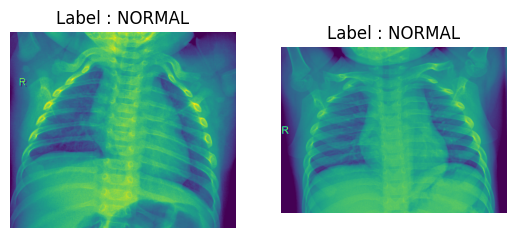

In [11]:
view_random_images("/content/chest-xray-pneumonia/chest_xray/chest_xray/train",class_names[0])

person1075_bacteria_3015.jpeg
person119_virus_225.jpeg


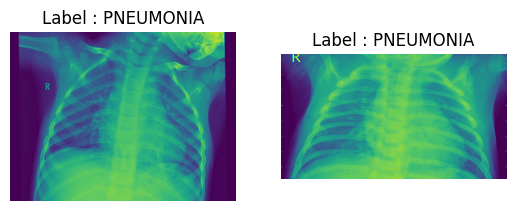

In [12]:
view_random_images("/content/chest-xray-pneumonia/chest_xray/chest_xray/train",class_names[1])

In [13]:
from pathlib import Path
def count_images_in_classes(train_dir):
    """
    Count the number of images in each class folder within the training directory.

    Args:
    - train_dir: str or Path object representing the training directory path.

    Returns:
    - A dictionary where keys are class names and values are the number of images in each class folder.
    """

    # Convert train_dir to a Path object
    train_dir = Path(train_dir)

    # Get a list of class folders (NORMAL and PNEUMONIA)
    class_folders = [item for item in train_dir.iterdir() if item.is_dir()]

    # Initialize an empty dictionary to store the count of images in each class folder
    image_counts = {}

    # Iterate over each class folder and count the number of image files
    for folder in class_folders:
        class_name = folder.name
        image_count = sum(1 for item in folder.glob("*") if item.is_file() and item.suffix.lower() in ['.jpg', '.png', '.jpeg'])
        image_counts[class_name] = image_count

    return image_counts

In [14]:
dict_class = count_images_in_classes("/content/chest-xray-pneumonia/chest_xray/chest_xray/train")

In [15]:
dict_class

{'NORMAL': 1341, 'PNEUMONIA': 3875}

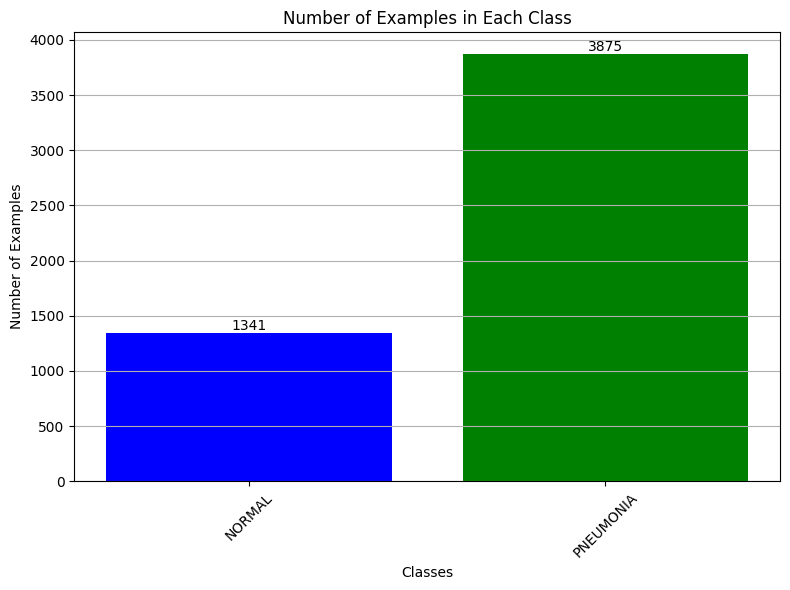

In [16]:

# Get class names and corresponding counts
class_names = list(dict_class.keys())
counts = list(dict_class.values())

# Create the histogram
plt.figure(figsize=(8, 6))
bars = plt.bar(class_names, counts, color=['blue', 'green'])  # Change colors as needed

# Add text labels above each bar
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom')

# Customize plot
plt.xlabel('Classes')
plt.ylabel('Number of Examples')
plt.title('Number of Examples in Each Class')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show plot
plt.tight_layout()
plt.show()


Data seems to be imbalanced.
Here NORMAL label has less examples as compared to the PNEUMONIA label.

So there is a chance of overfitting.

To prevent that as well increase the number of data ( A much simpler technique is to create copies of the original images and transform them subtly enough for them to be perceived as new images) we will use **data augmentation**.

In [95]:
COUNT_NORMAL = dict_class["NORMAL"]
print("Normal images count in training set: " + str(COUNT_NORMAL))

COUNT_PNEUMONIA = dict_class["PNEUMONIA"]
print("Pneumonia images count in training set: " + str(COUNT_PNEUMONIA))

Normal images count in training set: 1341
Pneumonia images count in training set: 3875


## 3.Import data

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir ="/content/chest-xray-pneumonia/chest_xray/chest_xray/train"
valid_dir ="/content/chest-xray-pneumonia/chest_xray/chest_xray/val"
test_dir = "/content/chest-xray-pneumonia/chest_xray/chest_xray/test"

train_datagen = ImageDataGenerator(rescale=1/255.,rotation_range=0.2,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,target_size=(150,150),color_mode="grayscale",class_mode="binary",batch_size=32,shuffle=True)

valid_data = valid_datagen.flow_from_directory(valid_dir,target_size=(150,150),color_mode="grayscale",class_mode="binary",batch_size=32,shuffle=True)

test_data  = test_datagen.flow_from_directory(test_dir,target_size=(150,150),color_mode="grayscale",class_mode="binary",batch_size=32,shuffle=True)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [96]:
TRAIN_IMG_COUNT = train_data.n
TRAIN_IMG_COUNT

5216

## 4.Create the model (baseline)

In [18]:
from tensorflow.keras.layers import Dense,Conv2D,BatchNormalization,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

model_1 = Sequential([
  Conv2D(32,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu",input_shape=(150,150,1)),
    BatchNormalization(),
    MaxPool2D((2,2) , strides = 2 , padding = 'same'),
    Conv2D(64,(3,3),padding="same",activation="relu"),
    BatchNormalization(),
    MaxPool2D((2,2) , strides = 2 , padding = 'same'),
    Conv2D(128,(3,3),padding="same",activation="relu"),
    BatchNormalization(),
    MaxPool2D((2,2) , strides = 2 , padding = 'same'),
    Flatten(),
    Dense(1,activation="sigmoid")

])
model_1.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])


In [19]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor="val_loss",patience=4,verbose=1,factor=0.2,mode="auto",min_lr=0.00001)

In [20]:
hist_1 = model_1.fit(
    train_data,
    epochs=12,
    validation_data=valid_data,
    callbacks=[reduce_lr]
)


Epoch 1/12
163/163 [==============================] - 49s 268ms/step - loss: 2.2236 - accuracy: 0.8046 - val_loss: 4.3019 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/12
163/163 [==============================] - 42s 258ms/step - loss: 1.3677 - accuracy: 0.8679 - val_loss: 20.4662 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/12
163/163 [==============================] - 42s 256ms/step - loss: 1.1370 - accuracy: 0.8836 - val_loss: 24.0742 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/12
163/163 [==============================] - 41s 254ms/step - loss: 0.9345 - accuracy: 0.8938 - val_loss: 3.0947 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 5/12
163/163 [==============================] - 42s 258ms/step - loss: 0.8850 - accuracy: 0.8905 - val_loss: 24.9413 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 6/12
163/163 [==============================] - 41s 254ms/step - loss: 0.7419 - accuracy: 0.9043 - val_loss: 5.5036 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 7/12
163/163 [=============================

In [23]:
# setting patience to 2
reduce_lr = ReduceLROnPlateau(monitor="val_loss",patience=2,verbose=1,factor=0.2,mode="auto",min_lr=0.00001)

In [24]:
model_2=tf.keras.models.clone_model(model_1)
model_2.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

In [25]:
hist_2 = model_2.fit(
    train_data,
    epochs=12,
    validation_data=valid_data,
    callbacks=[reduce_lr]
)


Epoch 1/12
163/163 [==============================] - 47s 262ms/step - loss: 1.0208 - accuracy: 0.8399 - val_loss: 4.0080 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/12
163/163 [==============================] - 43s 266ms/step - loss: 0.7264 - accuracy: 0.8832 - val_loss: 14.5539 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/12
163/163 [==============================] - 42s 256ms/step - loss: 0.7091 - accuracy: 0.8873 - val_loss: 3.4708 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/12
163/163 [==============================] - 43s 263ms/step - loss: 0.7355 - accuracy: 0.8924 - val_loss: 18.0140 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/12
163/163 [==============================] - ETA: 0s - loss: 0.6131 - accuracy: 0.8990
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
163/163 [==============================] - 42s 258ms/step - loss: 0.6131 - accuracy: 0.8990 - val_loss: 18.2382 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 6/12
163/163 [=========================

Adding 2 more conv blocks

In [28]:
model_3 = Sequential([
  Conv2D(32,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu",input_shape=(150,150,1)),
    BatchNormalization(),
    MaxPool2D((2,2) , strides = 2 , padding = 'same'),
    Conv2D(64,(3,3),padding="same",activation="relu"),
    BatchNormalization(),
    MaxPool2D((2,2) , strides = 2 , padding = 'same'),
    Conv2D(128,(3,3),padding="same",activation="relu"),
    BatchNormalization(),
    MaxPool2D((2,2) , strides = 2 , padding = 'same'),
    Conv2D(128,(3,3),padding="same",activation="relu"),
    BatchNormalization(),
    MaxPool2D((2,2) , strides = 2 , padding = 'same'),
    Conv2D(256,(3,3),padding="same",activation="relu"),
    BatchNormalization(),
    MaxPool2D((2,2) , strides = 2 , padding = 'same'),
    Flatten(),
    Dense(1,activation="sigmoid")

])
model_3.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])


In [29]:
hist_3 =  model_3.fit(
    train_data,
    epochs=12,
    validation_data=valid_data,
    callbacks=[reduce_lr]
)


Epoch 1/12
163/163 [==============================] - 47s 254ms/step - loss: 0.3639 - accuracy: 0.8806 - val_loss: 3.5577 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/12
163/163 [==============================] - 44s 269ms/step - loss: 0.2171 - accuracy: 0.9216 - val_loss: 4.6254 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/12
163/163 [==============================] - ETA: 0s - loss: 0.2149 - accuracy: 0.9208
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
163/163 [==============================] - 42s 255ms/step - loss: 0.2149 - accuracy: 0.9208 - val_loss: 3.8992 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/12
163/163 [==============================] - 42s 255ms/step - loss: 0.1514 - accuracy: 0.9400 - val_loss: 4.2109 - val_accuracy: 0.5000 - lr: 2.0000e-04
Epoch 5/12
163/163 [==============================] - 42s 256ms/step - loss: 0.1332 - accuracy: 0.9469 - val_loss: 2.8223 - val_accuracy: 0.5000 - lr: 2.0000e-04
Epoch 6/12
163/163 [====================

Adding a dense layer and also lets add dropout layers since we can clearly see that the model is overfitting..

Adding dropout layer just after after first conv2d then after the conv2d with 128 and then after the conv2d with 256 filters and finally one after the newly added dense layer.

In [31]:
from tensorflow.keras.layers import Dropout
model_4 = Sequential([
    Conv2D(32,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu",input_shape=(150,150,1)),
    Dropout(0.1),
    BatchNormalization(),
    MaxPool2D((2,2) , strides = 2 , padding = 'same'),
    Conv2D(64,(3,3),padding="same",activation="relu"),
    BatchNormalization(),
    MaxPool2D((2,2) , strides = 2 , padding = 'same'),
    Conv2D(128,(3,3),padding="same",activation="relu"),
    Dropout(0.2),
    BatchNormalization(),
    MaxPool2D((2,2) , strides = 2 , padding = 'same'),
    Conv2D(128,(3,3),padding="same",activation="relu"),
    BatchNormalization(),
    MaxPool2D((2,2) , strides = 2 , padding = 'same'),
    Conv2D(256,(3,3),padding="same",activation="relu"),
    Dropout(0.2),
    BatchNormalization(),
    MaxPool2D((2,2) , strides = 2 , padding = 'same'),
    Flatten(),
    Dense(128,activation="relu"),
    Dropout(0.2),
    Dense(1,activation="sigmoid")

])
model_4.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])


In [32]:
hist_4 =  model_4.fit(
    train_data,
    epochs=12,
    validation_data=valid_data,
    callbacks=[reduce_lr]
)

Epoch 1/12
163/163 [==============================] - 51s 279ms/step - loss: 0.3767 - accuracy: 0.8725 - val_loss: 9.7871 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/12
163/163 [==============================] - 42s 261ms/step - loss: 0.2160 - accuracy: 0.9143 - val_loss: 16.7644 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/12
163/163 [==============================] - ETA: 0s - loss: 0.2022 - accuracy: 0.9208
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
163/163 [==============================] - 43s 265ms/step - loss: 0.2022 - accuracy: 0.9208 - val_loss: 18.5383 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/12
163/163 [==============================] - 43s 264ms/step - loss: 0.1621 - accuracy: 0.9408 - val_loss: 7.3769 - val_accuracy: 0.5000 - lr: 2.0000e-04
Epoch 5/12
163/163 [==============================] - 43s 265ms/step - loss: 0.1423 - accuracy: 0.9490 - val_loss: 0.4961 - val_accuracy: 0.6875 - lr: 2.0000e-04
Epoch 6/12
163/163 [==================

As we can see val_accuracy has increased to 87% so lets see what type of accuracy it will give on the test data.

In [34]:
evaluation = model_4.evaluate(test_data)

20/20 [==============================] - 4s 177ms/step - loss: 0.2807 - accuracy: 0.8910


In [35]:
evaluation

[0.2806612253189087, 0.8910256624221802]

Lets train for longer epoch on this learning rate.

In [36]:
model_5 = tf.keras.models.clone_model(model_4)
model_5.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(learning_rate=4.0000e-05),
                metrics=["accuracy"])

In [37]:
hist_5 = model_5.fit(
    train_data,
    epochs=20,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps = len(valid_data)
)

Epoch 1/20
163/163 [==============================] - 47s 260ms/step - loss: 0.3832 - accuracy: 0.8457 - val_loss: 1.3220 - val_accuracy: 0.5000
Epoch 2/20
163/163 [==============================] - 46s 279ms/step - loss: 0.2384 - accuracy: 0.8982 - val_loss: 3.0991 - val_accuracy: 0.5000
Epoch 3/20
163/163 [==============================] - 43s 265ms/step - loss: 0.2090 - accuracy: 0.9153 - val_loss: 3.1655 - val_accuracy: 0.5000
Epoch 4/20
163/163 [==============================] - 42s 261ms/step - loss: 0.1977 - accuracy: 0.9178 - val_loss: 2.0860 - val_accuracy: 0.5000
Epoch 5/20
163/163 [==============================] - 43s 267ms/step - loss: 0.1757 - accuracy: 0.9281 - val_loss: 1.8356 - val_accuracy: 0.5000
Epoch 6/20
163/163 [==============================] - 43s 261ms/step - loss: 0.1724 - accuracy: 0.9287 - val_loss: 1.5609 - val_accuracy: 0.5000
Epoch 7/20
163/163 [==============================] - 43s 265ms/step - loss: 0.1638 - accuracy: 0.9317 - val_loss: 0.8053 - val_ac

We can see the model is overfitting badly.. so add more dropout layer..

and again use lronplataue

This time lets monitor val_accuracy and set min_lr=0.000001 for 12 epoch.

In [38]:
model_6 = Sequential([
    Conv2D(32,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu",input_shape=(150,150,1)),
    Dropout(0.1),
    BatchNormalization(),
    MaxPool2D((2,2) , strides = 2 , padding = 'same'),
    Conv2D(64,(3,3),padding="same",activation="relu"),
    Dropout(0.2),
    BatchNormalization(),
    MaxPool2D((2,2) , strides = 2 , padding = 'same'),
    Conv2D(128,(3,3),padding="same",activation="relu"),
    Dropout(0.3),
    BatchNormalization(),
    MaxPool2D((2,2) , strides = 2 , padding = 'same'),
    Conv2D(128,(3,3),padding="same",activation="relu"),
    Dropout(0.2),
    BatchNormalization(),
    MaxPool2D((2,2) , strides = 2 , padding = 'same'),
    Conv2D(256,(3,3),padding="same",activation="relu"),
    Dropout(0.3),
    BatchNormalization(),
    MaxPool2D((2,2) , strides = 2 , padding = 'same'),
    Flatten(),
    Dense(128,activation="relu"),
    Dropout(0.2),
    Dense(1,activation="sigmoid")

])
model_6.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

In [41]:
reduce_lr = ReduceLROnPlateau(monitor="val_accuracy",patience=2,verbose=1,factor=0.2,mode="auto",min_lr=0.000001)

In [42]:
hist_6=model_6.fit(
    train_data,
    epochs=12,
    validation_data=valid_data,
    callbacks=[reduce_lr]
)

Epoch 1/12
163/163 [==============================] - 45s 273ms/step - loss: 0.2431 - accuracy: 0.9007 - val_loss: 16.6066 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/12
163/163 [==============================] - 45s 276ms/step - loss: 0.2032 - accuracy: 0.9202 - val_loss: 10.6017 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/12
163/163 [==============================] - ETA: 0s - loss: 0.1779 - accuracy: 0.9354
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
163/163 [==============================] - 43s 264ms/step - loss: 0.1779 - accuracy: 0.9354 - val_loss: 6.4131 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/12
163/163 [==============================] - 44s 271ms/step - loss: 0.1423 - accuracy: 0.9477 - val_loss: 1.1232 - val_accuracy: 0.5000 - lr: 2.0000e-04
Epoch 5/12
163/163 [==============================] - ETA: 0s - loss: 0.1337 - accuracy: 0.9511
Epoch 5: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
163/163 [==================

### Evaluating model_4

Model 4 is performing better out of all the six model we trained..

In [43]:
model_4.evaluate(test_data) # unseen data

20/20 [==============================] - 4s 177ms/step - loss: 0.2807 - accuracy: 0.8910


[0.2806611955165863, 0.8910256624221802]

In [44]:
preds = model_4.predict(test_data)
preds = tf.round(preds)

20/20 [==============================] - 5s 218ms/step


In [45]:
preds = tf.cast(preds,dtype=tf.int32)

In [62]:
preds = tf.squeeze(preds,axis=1)

In [63]:
preds.shape

TensorShape([624])

In [56]:
y = test_data.labels

In [64]:
y = tf.constant(y)

<tf.Tensor: shape=(624,), dtype=int32, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     

In [49]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [66]:
# Classification report
print(classification_report(y,preds))

              precision    recall  f1-score   support

           0       0.38      0.38      0.38       234
           1       0.63      0.62      0.62       390

    accuracy                           0.53       624
   macro avg       0.50      0.50      0.50       624
weighted avg       0.53      0.53      0.53       624



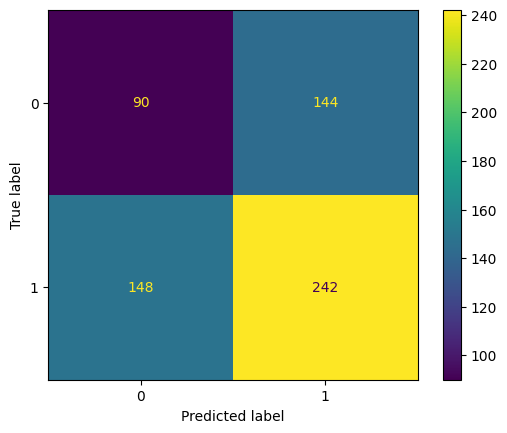

In [67]:
ConfusionMatrixDisplay.from_predictions(y,preds)

From the looks of it,our model is giving good accuracy yet it is getting confused..


We have to continue the experimentation till we get the best model..

In [68]:
# Reimporting the data but with less augmentation

train_dir ="/content/chest-xray-pneumonia/chest_xray/chest_xray/train"
valid_dir ="/content/chest-xray-pneumonia/chest_xray/chest_xray/val"
test_dir = "/content/chest-xray-pneumonia/chest_xray/chest_xray/test"

train_datagen = ImageDataGenerator(rescale=1/255.,rotation_range=30,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
valid_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,target_size=(150,150),color_mode="grayscale",class_mode="binary",batch_size=32,shuffle=True)

valid_data = valid_datagen.flow_from_directory(valid_dir,target_size=(150,150),color_mode="grayscale",class_mode="binary",batch_size=32,shuffle=True)

test_data  = test_datagen.flow_from_directory(test_dir,target_size=(150,150),color_mode="grayscale",class_mode="binary",batch_size=32,shuffle=True)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [69]:
# change the factor to 0.3
reduce_lr = ReduceLROnPlateau(monitor="val_accuracy",patience=2,verbose=1,factor=0.3,mode="auto",min_lr=0.000001)

In [70]:
model_7 = Sequential([
    Conv2D(32,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu",input_shape=(150,150,1)),
    BatchNormalization(),
    MaxPool2D((2,2) , strides = 2 , padding = 'same'),
    Conv2D(64,(3,3),padding="same",activation="relu"),
    Dropout(0.1),
    BatchNormalization(),
    MaxPool2D((2,2) , strides = 2 , padding = 'same'),
    Conv2D(64,(3,3),padding="same",activation="relu"),
    BatchNormalization(),
    MaxPool2D((2,2) , strides = 2 , padding = 'same'),
    Conv2D(128,(3,3),padding="same",activation="relu"),
    Dropout(0.2),
    BatchNormalization(),
    MaxPool2D((2,2) , strides = 2 , padding = 'same'),
    Conv2D(256,(3,3),padding="same",activation="relu"),
    Dropout(0.2),
    BatchNormalization(),
    MaxPool2D((2,2) , strides = 2 , padding = 'same'),
    Flatten(),
    Dense(128,activation="relu"),
    Dropout(0.2),
    Dense(1,activation="sigmoid")

])

Since precision and recall scores are causing problem , let add those 2 into the metrics.

In [75]:
# Using different optimizer
model_7.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy', tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')])

In [76]:
hist_7 = model_7.fit(
    train_data,
    epochs=12,
    validation_data=valid_data,
    callbacks=[reduce_lr]
)

Epoch 1/12
163/163 [==============================] - 45s 254ms/step - loss: 0.2930 - accuracy: 0.8905 - precision: 0.9273 - recall: 0.9252 - val_loss: 25.4886 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - lr: 0.0010
Epoch 2/12
163/163 [==============================] - 43s 262ms/step - loss: 0.2329 - accuracy: 0.9168 - precision: 0.9445 - recall: 0.9435 - val_loss: 10.8169 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - lr: 0.0010
Epoch 3/12
163/163 [==============================] - ETA: 0s - loss: 0.2017 - accuracy: 0.9283 - precision: 0.9513 - recall: 0.9523
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 [==============================] - 42s 259ms/step - loss: 0.2017 - accuracy: 0.9283 - precision: 0.9513 - recall: 0.9523 - val_loss: 60.1926 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - lr: 0.0010
Epoch 4/12
163/163 [==============================] - 44s 268ms/step - loss: 0.

### Weightage

Weighing the minority class higher as compared to majority class

In [98]:
initial_bias = np.log([COUNT_PNEUMONIA/COUNT_NORMAL])
initial_bias


array([1.06113006])

In [99]:
weight_for_0 = (1 / COUNT_NORMAL)*(TRAIN_IMG_COUNT)/2.0
weight_for_1 = (1 / COUNT_PNEUMONIA)*(TRAIN_IMG_COUNT)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.94
Weight for class 1: 0.67


In [108]:
model_8 = tf.keras.models.clone_model(model_4)
model_8.compile(loss="binary_crossentropy",optimizer=Adam(),
                 metrics = ['accuracy', tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')],
                run_eagerly=True
)

In [ ]:
hist_8 = model_8.fit(
    train_data,
    epochs=12,
    validation_data=valid_data,
    callbacks=[reduce_lr],
    class_weight = class_weight
)

Epoch 1/12


163/163 [==============================] - 52s 291ms/step - loss: 0.4118 - accuracy: 0.8652 - precision: 0.9613 - recall: 0.8529 - val_loss: 6.9468 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - lr: 0.0010
Epoch 2/12
163/163 [==============================] - 47s 287ms/step - loss: 0.2379 - accuracy: 0.9080 - precision: 0.9709 - recall: 0.9032 - val_loss: 7.4782 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - lr: 0.0010
Epoch 3/12
163/163 [==============================] - ETA: 0s - loss: 0.2125 - accuracy: 0.9153 - precision: 0.9767 - recall: 0.9076
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 [==============================] - 47s 285ms/step - loss: 0.2125 - accuracy: 0.9153 - precision: 0.9767 - recall: 0.9076 - val_loss: 8.0183 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - lr: 0.0010
Epoch 4/12
  2/163 [..............................] - ETA: 1:15 - loss: 0.2567 - accuracy: 0.

5216